# **Analise e Aprimoramentos em uma Base de Dados sobre Funcionários de uma Empresa**


Vamos analisar os dados de funcionários de uma empresa multinacional não especificada, limpá-la e tirar insights relevantes \
Execute a célula abaixo para instalar a base de dados em `.xlsx`

# 1 - Instalação da Base de Dados

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c985af556c4bccef2cf2fb489f418b370d34f6c2dbac8193ac602896e8688eaf
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import wget
# URL do arquivo Excel no GitHub
url = 'https://github.com/VictorCamolese/EBAC-DataAnalyticsProjects/raw/main/employee_project/employee_sample_data.xlsx'

arquivo = 'employee_sample_data.xlsx'

# Baixar o arquivo usando wget
wget.download(url, arquivo)


'employee_sample_data.xlsx'

# 2 - Primeiras impressões da Base de Dados

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_excel('employee_sample_data.xlsx')
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

## - 2.1 - Limpeza de Dados

- Limpeza de erros gramaticais no DF

In [5]:
list(set(data['Job Title']))

['Sr. Account Representative',
 'Systems Analyst',
 'Controls Engineer',
 'Test Engineer',
 'Computer Systems Manager',
 'Vice President',
 'Sr. Analyst',
 'Analyst',
 'Automation Engineer',
 'Business Partner',
 'Operations Engineer',
 'Analyst II',
 'Technical Architect',
 'IT Coordinator',
 'Account Representative',
 'Sr. Manger',
 'Quality Engineer',
 'System Administrator\xa0',
 'Solutions Architect',
 'Development Engineer',
 'Network Engineer',
 'HRIS Analyst',
 'Sr. Business Partner',
 'Engineering Manager',
 'Network Architect',
 'Cloud Infrastructure Architect',
 'Field Engineer',
 'Enterprise Architect',
 'Manager',
 'Network Administrator',
 'Service Desk Analyst',
 'Director',
 'IT Systems Architect']

In [6]:
data['Job Title'] = data['Job Title'].apply(lambda x: 'Sr. Manager' if x == 'Sr. Manger' else x)
data['Job Title'] = data['Job Title'].apply(lambda x: 'System Administrator' if x == 'System Administrator\xa0' else x)

- Simplificando algumas instancias

In [7]:
# male = 0 and female = 1
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Female' else (0 if x == 'Male' else 2))

In [8]:
# verificando se temos instancias diferentes das esperadas em Gender
x=list(set(data['Gender']))
x

[0, 1]

In [9]:
data.head(3)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,1,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,0,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,1,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT


## 2.2 - Normalização de Colunas

- Normalizando a coluna *Age*

A normalização de variáveis numéricas é um processo comum em análise de dados e aprendizado de máquina. \
Esse processo envolve a transformação das variáveis numéricas para uma escala comum, geralmente entre **0 e 1**, a fim de garantir que elas tenham impacto semelhante em algoritmos de machine learning e análises estatísticas, independentemente de suas unidades originais ou escalas. \
\
 ***normalizacao = (x - minimo) / (maximo - minimo)***

In [10]:
data['Age'] = data['Age'].apply(lambda x: (x - data['Age'].min()) / (data['Age'].max() - data['Age'].min()))

- Normalizando a coluna *Annual Salary* com a biblioteca python `Sci-kit Learn`

o método **minmax_scale** é uma função que retorna a normalização de um conjunto de dados numéricos; \
Ela precisa ser aplicada a um conjunto de dados. \
Para normalizar a coluna 'Annual Salary' usando o **MinMaxScaler**, precisamos criar uma intância para iterar com o conjunto de dados:

In [11]:
from sklearn.preprocessing import MinMaxScaler as minmax_scale

# instancia do minmax
scaler = minmax_scale()

data['Annual Salary'] = scaler.fit_transform(data[['Annual Salary']])

- Normalizando a coluna *'Bonus &'*

In [12]:
data['Bonus %'] = scaler.fit_transform(data[['Bonus %']])
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,1,Black,0.750,2016-04-08,0.464857,0.375,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,0,Asian,0.850,1997-11-29,0.274278,0.000,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,1,Caucasian,0.625,2006-10-26,0.563261,0.500,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,1,Caucasian,0.025,2019-09-27,0.205324,0.175,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,0,Asian,0.750,1995-11-20,0.253375,0.000,United States,Phoenix,NaT


---

## 2.3 - Criação e Manipulação de Colunas

In [13]:
df = data.drop(columns=['Full Name','City'])
df.head()

,EEID,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,Exit Date
0,E02387,Sr. Manager,IT,Research & Development,1,Black,0.750,2016-04-08,0.464857,0.375,United States,2021-10-16
1,E04105,Technical Architect,IT,Manufacturing,0,Asian,0.850,1997-11-29,0.274278,0.000,China,NaT
2,E02572,Director,Finance,Speciality Products,1,Caucasian,0.625,2006-10-26,0.563261,0.500,United States,NaT
3,E02832,Computer Systems Manager,IT,Manufacturing,1,Caucasian,0.025,2019-09-27,0.205324,0.175,United States,NaT
4,E01639,Sr. Analyst,Finance,Manufacturing,0,Asian,0.750,1995-11-20,0.253375,0.000,United States,NaT


- Coluna **Years of service** \
Vamos definir os Exit Date nulos como o dia de hoje para calcular os anos de serviços de todos os funcionários. Após isso, retornamos os valores nulos

In [14]:
import datetime

# transformando os valores nulos na data de hoje
df['Exit Date'].fillna(pd.to_datetime(datetime.date.today()), inplace=True)
df.head()

# calculo de anos de servico
df['Years of Service'] = round((df['Exit Date'] - df['Hire Date']).dt.days / 365, 1)

# transformando novamente o que for == data de hoje em NaN
data_de_hoje = datetime.date.today()
df.loc[df['Exit Date'] == pd.to_datetime(data_de_hoje), 'Exit Date'] = np.nan

---
- Coluna **Hired** \
está coluna retornará: \
 0 == funcionário **não** mais contratado \
 1 == funcionário ainda contratado

In [15]:
# condicionando q caso instancia for nula == 0
df['Hired'] = df['Exit Date'].apply(lambda x: 0 if pd.notna(x) else 1)


In [16]:
df.head()

,EEID,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,Exit Date,Years of Service,Hired
0,E02387,Sr. Manager,IT,Research & Development,1,Black,0.750,2016-04-08,0.464857,0.375,United States,2021-10-16,5.5,0
1,E04105,Technical Architect,IT,Manufacturing,0,Asian,0.850,1997-11-29,0.274278,0.000,China,NaT,25.8,1
2,E02572,Director,Finance,Speciality Products,1,Caucasian,0.625,2006-10-26,0.563261,0.500,United States,NaT,16.9,1
3,E02832,Computer Systems Manager,IT,Manufacturing,1,Caucasian,0.025,2019-09-27,0.205324,0.175,United States,NaT,3.9,1
4,E01639,Sr. Analyst,Finance,Manufacturing,0,Asian,0.750,1995-11-20,0.253375,0.000,United States,NaT,27.8,1


## 2.4 - Categorizando Tipos de Funcionários

Vamos separar em categorias cada funcionário de acordo com o tempo de atividade na empresa: \
**vet** = Veterano \
**int** = Intermediário \
**new** = Novo \
\
Vamos criar uma função que aplique a filtragem das instancias, para depois aplicarmos no DataFrame

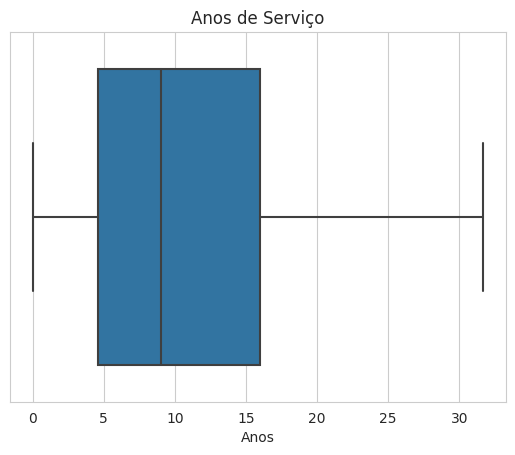

In [17]:
# verificando os anos de servico dos funcionarios da empresa
with sns.axes_style('whitegrid'):
  year_grafic = sns.boxplot(x=df['Years of Service'])
  year_grafic.set(title='Anos de Serviço', xlabel='Anos')

- A maioria dos funcionários acomulam/acomularam de 5 a 15 anos de permanência na empresa \
- A média varia de 9 a 10 anos \
\
Com isso, vamos supor que até 5 anos ainda é uma pessoa bem nova na empresa, enquanto acima de 15 anos de empresa já é alguem bem mais familiarizado com o seu trabalho e ambiente.

In [18]:
# criando a funcao de filtragem de categorias
def category_filter(years):
  if years <= 5:
    return 'new'
  elif years <= 15:
    return 'int'
  else:
    return 'vet'

In [19]:
# aplicando a funcao
df['Category'] = df['Years of Service'].apply(category_filter)
df.head()

,EEID,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,Exit Date,Years of Service,Hired,Category
0,E02387,Sr. Manager,IT,Research & Development,1,Black,0.750,2016-04-08,0.464857,0.375,United States,2021-10-16,5.5,0,int
1,E04105,Technical Architect,IT,Manufacturing,0,Asian,0.850,1997-11-29,0.274278,0.000,China,NaT,25.8,1,vet
2,E02572,Director,Finance,Speciality Products,1,Caucasian,0.625,2006-10-26,0.563261,0.500,United States,NaT,16.9,1,vet
3,E02832,Computer Systems Manager,IT,Manufacturing,1,Caucasian,0.025,2019-09-27,0.205324,0.175,United States,NaT,3.9,1,new
4,E01639,Sr. Analyst,Finance,Manufacturing,0,Asian,0.750,1995-11-20,0.253375,0.000,United States,NaT,27.8,1,vet


## 2.5 - Retoques na estrutura do DataFrame

Vamos fazer as ultimas manipulações para deixar o DF mais fácil de retirar informações uteis

- Renomeação de colunas \
- Ordenação do DF

In [20]:
# dict() para substituicao de colunas
columns_name = {'Job Title': 'Job',
               'Business Unit': 'Business',
               'Annual Salary': 'Salary',
               'Bonus %': 'Bonus'}
# aplicando o dict()
df = df.rename(columns=columns_name)

# reorganizando colunas
x = ['EEID','Job','Department','Business','Gender','Ethnicity','Age','Salary','Bonus','Country','Hire Date','Exit Date','Years of Service','Hired','Category']
df = df[x]

# reordenando o DF pelos departamentos
df = df.sort_values(by='Department')

In [21]:
df.head()

,EEID,Job,Department,Business,Gender,Ethnicity,Age,Salary,Bonus,Country,Hire Date,Exit Date,Years of Service,Hired,Category
999,E03545,Vice President,Accounting,Corporate,1,Asian,0.950,0.806336,0.775,United States,2020-07-26,NaT,3.1,1,new
274,E02555,Sr. Analyst,Accounting,Manufacturing,0,Latino,0.325,0.173933,0.000,Brazil,2008-07-05,NaT,15.2,1,vet
277,E02062,Analyst,Accounting,Research & Development,1,Latino,0.750,0.039481,0.000,Brazil,1996-06-26,NaT,27.2,1,vet
806,E04249,Vice President,Accounting,Corporate,1,Asian,0.550,0.931650,0.825,United States,2021-12-26,NaT,1.7,1,new
287,E00825,Sr. Analyst,Accounting,Corporate,1,Latino,0.400,0.137808,0.000,United States,2016-06-12,NaT,7.2,1,int


# 3 - Desafio de Análise de Dados: Identificação de Retenção de Funcionários

**Objetivo:** Analisar a retenção de funcionários na empresa ao longo do tempo e identificar os fatores que influenciam na permanência dos funcionários. \


## 3.1 - Análise da Retenção de Funcionários ao Longo do Tempo:

Calcule a taxa de retenção de funcionários a cada ano. Para isso, você pode agrupar os dados por ano e calcular a proporção de funcionários que permaneceram empregados em relação ao total de funcionários naquele ano.

## 3.2 - Visualização da Retenção de Funcionários:

Crie um gráfico de linha que mostre a taxa de retenção de funcionários ao longo dos anos. Isso ajudará a identificar tendências ao longo do tempo.


## 3.3 - Análise dos Fatores de Influência:

Realize análises para determinar se fatores como salário, categoria de funcionário, departamento, idade ou outros têm impacto na retenção de funcionários. Você pode usar técnicas de análise estatística, como testes de hipótese ou análise de regressão, para investigar esses fatores.


## 3.4 - Segmentação dos Funcionários:

Segmente os funcionários em grupos com base em características relevantes e analise a taxa de retenção em cada segmento. Por exemplo, compare a retenção entre funcionários novos e veteranos, funcionários de diferentes departamentos, ou funcionários com diferentes níveis de salário.

---

## 3.5 - Recomendações de Melhoria:

 Com base nas análises realizadas, ofereça recomendações à empresa para melhorar a retenção de funcionários, como ajustar políticas de remuneração, programas de treinamento ou estratégias de recrutamento.